# 쌍성 데이터 확인

In [1]:
import pandas as pd 

train = pd.read_csv('../new/t_cross_train.csv')
test = pd.read_csv('../new/t_cross_test.csv')

s_df = pd.concat([train, test])
s_df

,parallax,l,b,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.591158,358.120608,1.341316,0.600683,0.208506,18.308180,3.330145,0
1,0.342870,322.286221,5.765249,1.394752,0.552415,20.113094,2.369076,0
2,0.738506,8.883826,0.945923,1.297335,0.441671,19.531239,2.658411,0
3,0.813744,30.357954,-2.293423,0.000000,0.683165,19.942703,2.246302,0
4,1.138839,283.724818,4.703923,3.823559,0.764093,20.105738,1.548685,0
...,...,...,...,...,...,...,...,...
57355,0.459307,275.521472,2.757137,0.000000,0.344013,19.785795,1.394045,0
57356,0.775322,332.120746,2.175602,0.000000,0.116216,17.915752,1.751167,0
57357,1.218430,137.235845,38.119971,0.000000,0.017844,14.884115,0.892797,0
57358,0.534865,2.046559,-9.704276,0.245902,0.135302,17.919464,0.849689,0


In [2]:
s_df.is_binary.value_counts()

is_binary
0    342642
1      2999
Name: count, dtype: int64

In [3]:
s_df.corr()['is_binary'].sort_values(ascending=False)[1:]

parallax                    0.141219
b                           0.001576
l                           0.000691
astrometric_excess_noise   -0.022305
bp_rp                      -0.067428
parallax_error             -0.082760
phot_g_mean_mag            -0.300561
Name: is_binary, dtype: float64

<Axes: >

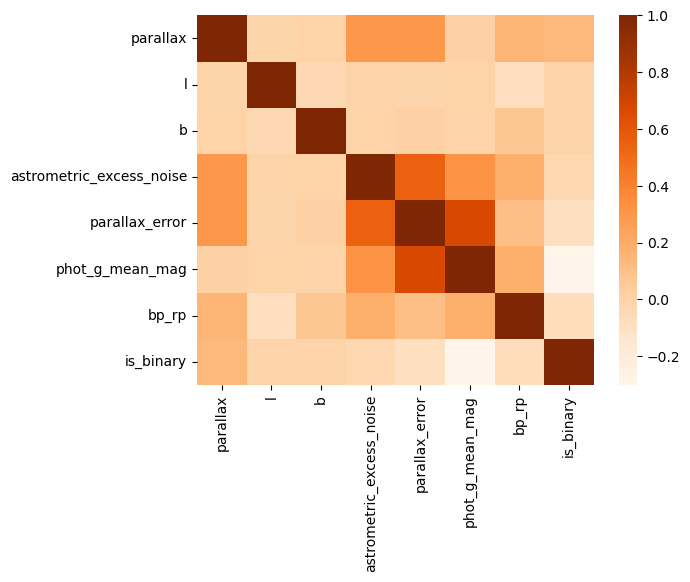

In [4]:
import seaborn as sns
corr = s_df.corr()
sns.heatmap(corr, cmap= "Oranges")

In [5]:
from statsmodels.api import OLS

features, targets = s_df.iloc[:, :-1],s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):              0.045
Method:                 Least Squares   F-statistic:                              2309.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        23:45:37   Log-Likelihood:                      3.3786e+05
No. Observations:              345641   AIC:                                 -6.757e+05
Df Residuals:                  345634   BIC:                                 -6.756e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = s_df.iloc[:, :-1],s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[68419   110]
 [  492   108]]
정확도: 0.9913, 정밀도: 0.4954, 재현율: 0.1800, F1:0.2641, AUC:0.5892
###########################################################################


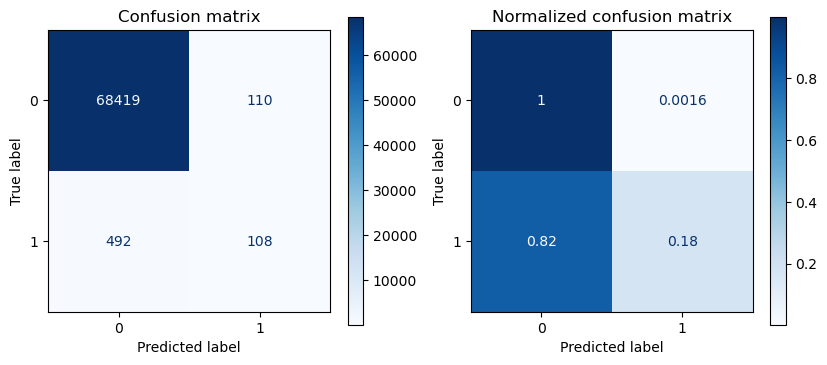

In [8]:
get_evaluation(y_test, prediction, lg, X_test)

In [9]:
s_df

,parallax,l,b,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.591158,358.120608,1.341316,0.600683,0.208506,18.308180,3.330145,0
1,0.342870,322.286221,5.765249,1.394752,0.552415,20.113094,2.369076,0
2,0.738506,8.883826,0.945923,1.297335,0.441671,19.531239,2.658411,0
3,0.813744,30.357954,-2.293423,0.000000,0.683165,19.942703,2.246302,0
4,1.138839,283.724818,4.703923,3.823559,0.764093,20.105738,1.548685,0
...,...,...,...,...,...,...,...,...
57355,0.459307,275.521472,2.757137,0.000000,0.344013,19.785795,1.394045,0
57356,0.775322,332.120746,2.175602,0.000000,0.116216,17.915752,1.751167,0
57357,1.218430,137.235845,38.119971,0.000000,0.017844,14.884115,0.892797,0
57358,0.534865,2.046559,-9.704276,0.245902,0.135302,17.919464,0.849689,0


In [10]:
# 언더샘플링
sl0 = s_df[s_df['is_binary']==0].sample(2999, random_state=321)
sl1 = s_df[s_df['is_binary']==1]

under_s_df = pd.concat([sl0, sl1]).reset_index(drop=True)
under_s_df['is_binary'].value_counts()

is_binary
0    2999
1    2999
Name: count, dtype: int64

In [11]:
from statsmodels.api import OLS

features, targets = under_s_df.iloc[:, :-1],under_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.617
Model:                            OLS   Adj. R-squared (uncentered):              0.617
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        23:45:39   Log-Likelihood:                         -3551.5
No. Observations:                5998   AIC:                                      7117.
Df Residuals:                    5991   BIC:                                      7164.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = under_s_df.iloc[:, :-1],under_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[569  31]
 [ 45 555]]
정확도: 0.9367, 정밀도: 0.9471, 재현율: 0.9250, F1:0.9359, AUC:0.9367
###########################################################################


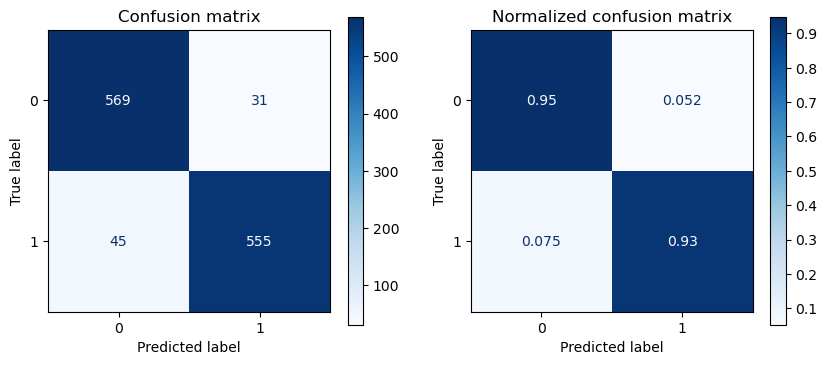

In [14]:
get_evaluation(y_test, prediction, lg, X_test)

array([[<Axes: title={'center': 'parallax'}>,
        <Axes: title={'center': 'l'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'astrometric_excess_noise'}>,
        <Axes: title={'center': 'parallax_error'}>,
        <Axes: title={'center': 'phot_g_mean_mag'}>],
       [<Axes: title={'center': 'bp_rp'}>,
        <Axes: title={'center': 'is_binary'}>, <Axes: >]], dtype=object)

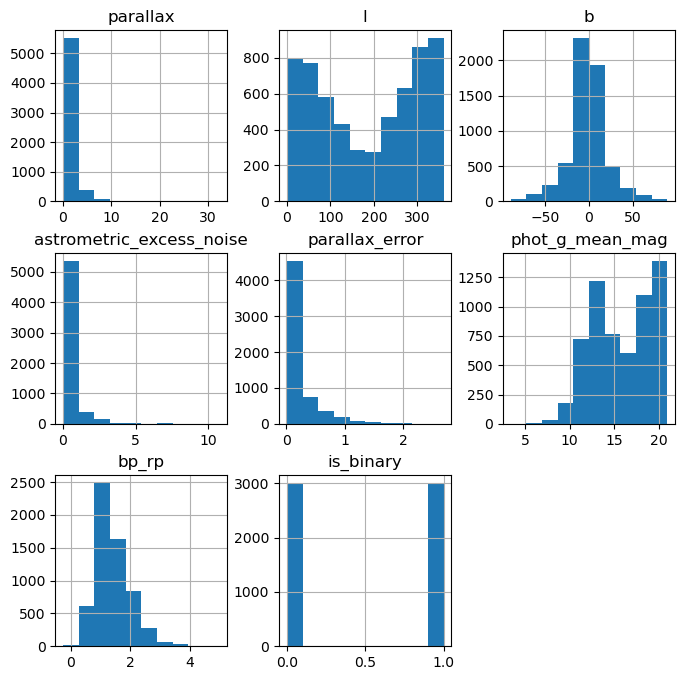

In [15]:
under_s_df.hist(figsize=(8, 8))

In [16]:
from sklearn.preprocessing import PowerTransformer

columns = under_s_df.iloc[:, :-1].columns
p_u_s_df = under_s_df.copy()

for column in columns:
    ptf = PowerTransformer(standardize=False)
    result = ptf.fit_transform(under_s_df[[column]])
    p_u_s_df[column] = result 

p_u_s_df


,parallax,l,b,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.405387,29.989781,-20.821766,0.339035,0.161142,35.026308,0.800157,0
1,0.188224,3.996458,-7.358236,0.351940,0.118940,31.172490,0.742131,0
2,0.205855,19.555950,35.146779,-0.000000,0.084320,31.958381,0.663411,0
3,0.320487,7.550987,22.834832,0.397788,0.191525,36.422794,0.828532,0
4,0.152861,59.127006,6.575563,0.373740,0.180273,36.332991,0.828336,0
...,...,...,...,...,...,...,...,...
5993,0.371185,58.902434,27.420604,0.123394,0.021577,19.575664,0.689366,1
5994,0.615969,58.219336,-45.528967,0.279710,0.048039,19.914137,0.451025,1
5995,0.111000,7.469079,-1.852046,0.105242,0.064343,28.957543,0.866681,1
5996,0.191657,52.601578,7.339623,0.129298,0.017147,18.231011,0.945831,1


In [17]:
from statsmodels.api import OLS

features, targets = p_u_s_df.iloc[:, :-1],p_u_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              3692.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        23:45:40   Log-Likelihood:                         -1423.1
No. Observations:                5998   AIC:                                      2860.
Df Residuals:                    5991   BIC:                                      2907.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

array([[<Axes: title={'center': 'parallax'}>,
        <Axes: title={'center': 'l'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'astrometric_excess_noise'}>,
        <Axes: title={'center': 'parallax_error'}>,
        <Axes: title={'center': 'phot_g_mean_mag'}>],
       [<Axes: title={'center': 'bp_rp'}>,
        <Axes: title={'center': 'is_binary'}>, <Axes: >]], dtype=object)

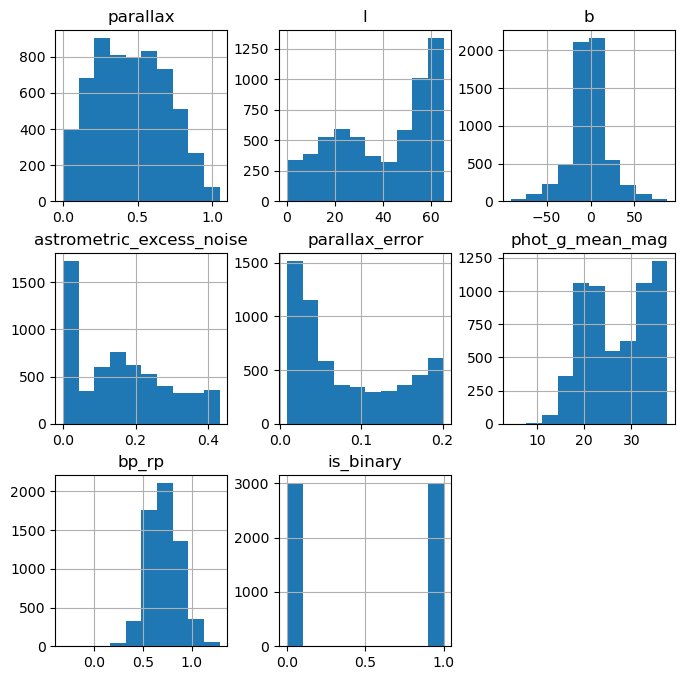

In [18]:
p_u_s_df.hist(figsize=(8, 8))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = p_u_s_df.iloc[:, :-1],p_u_s_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=321)

lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)
# lg.fit(over_X_train, over_y_train)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

오차 행렬
[[573  27]
 [ 50 550]]
정확도: 0.9358, 정밀도: 0.9532, 재현율: 0.9167, F1:0.9346, AUC:0.9358
###########################################################################


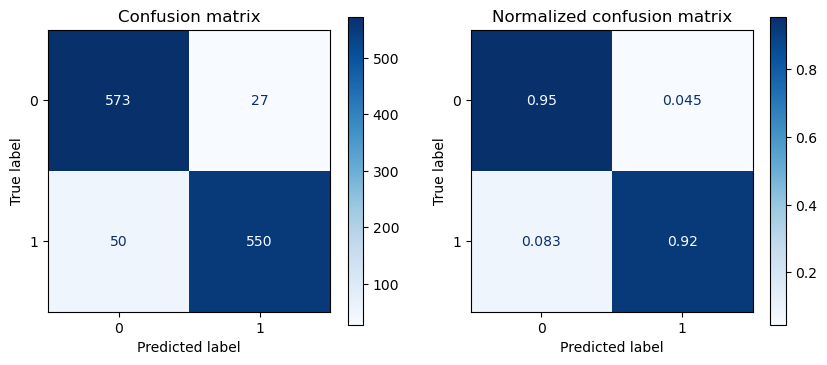

In [20]:
get_evaluation(y_test, prediction, lg, X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 불러오기
features, targets = p_u_s_df.iloc[:,:-1], p_u_s_df.iloc[:,-1]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=321)

# K-폴드 교차 검증 설정
kfold = KFold(n_splits=15, random_state=321, shuffle=True)

# 로지스틱 회귀 모델 설정
lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)

# 파라미터 그리드 설정
parameters = {
    'C': [0.01, 0.1, 1, 10, 100]
    # 'penalty': ['l1', 'l2']
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(lg, param_grid=parameters, cv=kfold, scoring='accuracy')  # 'r2' 대신 'accuracy' 사용
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))


Best parameters: {'C': 10}
Best cross-validation score: 0.934


오차 행렬
[[300 284]
 [323 293]]
정확도: 0.4942, 정밀도: 0.5078, 재현율: 0.4756, F1:0.4912, AUC:0.4947
###########################################################################


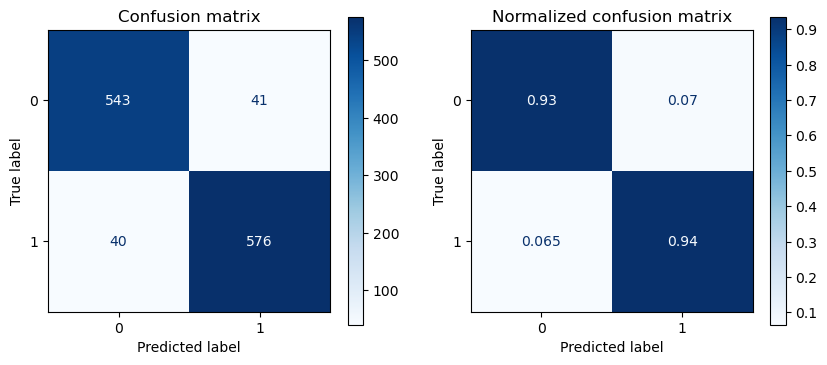

In [22]:
get_evaluation(y_test, prediction, grid_lgb, X_test)

In [23]:
pre_s_df = p_u_s_df.drop(labels=['b'], axis = 1)
pre_s_df

,parallax,l,astrometric_excess_noise,parallax_error,phot_g_mean_mag,bp_rp,is_binary
0,0.405387,29.989781,0.339035,0.161142,35.026308,0.800157,0
1,0.188224,3.996458,0.351940,0.118940,31.172490,0.742131,0
2,0.205855,19.555950,-0.000000,0.084320,31.958381,0.663411,0
3,0.320487,7.550987,0.397788,0.191525,36.422794,0.828532,0
4,0.152861,59.127006,0.373740,0.180273,36.332991,0.828336,0
...,...,...,...,...,...,...,...
5993,0.371185,58.902434,0.123394,0.021577,19.575664,0.689366,1
5994,0.615969,58.219336,0.279710,0.048039,19.914137,0.451025,1
5995,0.111000,7.469079,0.105242,0.064343,28.957543,0.866681,1
5996,0.191657,52.601578,0.129298,0.017147,18.231011,0.945831,1


In [24]:
from statsmodels.api import OLS

features, targets = pre_s_df.iloc[:, :-1],pre_s_df.iloc[:, -1]

model = OLS(targets, features)

print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              is_binary   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              4307.
Date:                Mon, 13 May 2024   Prob (F-statistic):                        0.00
Time:                        23:45:41   Log-Likelihood:                         -1423.6
No. Observations:                5998   AIC:                                      2859.
Df Residuals:                    5992   BIC:                                      2899.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd

features, targets = pre_s_df.iloc[:,:-1], pre_s_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

# K-폴드 교차 검증 설정
kfold = KFold(n_splits=15, random_state=321, shuffle=True)

# 로지스틱 회귀 모델 설정
lg = LogisticRegression(solver='liblinear', random_state=321, max_iter=10000)

# 파라미터 그리드 설정
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# GridSearchCV 설정
grid_lgb = GridSearchCV(lg, param_grid=parameters, cv=kfold, scoring='accuracy')  # 'r2' 대신 'accuracy' 사용
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_lgb.best_score_))



Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.934


오차 행렬
[[300 284]
 [323 293]]
정확도: 0.4942, 정밀도: 0.5078, 재현율: 0.4756, F1:0.4912, AUC:0.4947
###########################################################################


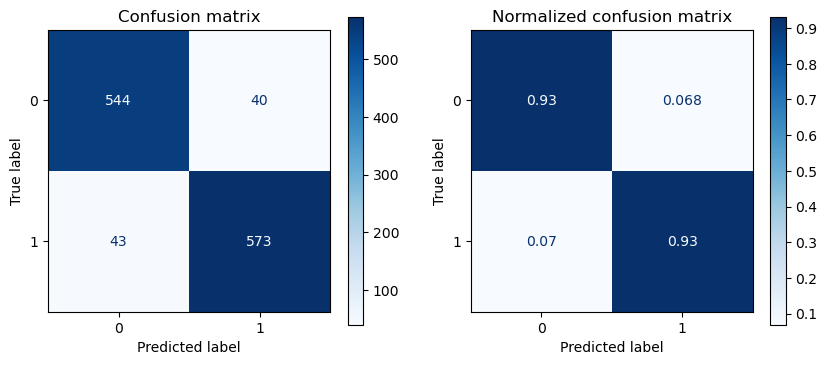

In [27]:
get_evaluation(y_test, prediction, grid_lgb, X_test)

In [28]:
from sklearn.model_selection import cross_val_score, KFold

features, targets = pre_s_df.iloc[:,:-1], pre_s_df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=321, shuffle=True)
scores = cross_val_score(grid_lgb, features, targets , cv=kf)
scores

array([0.92666667, 0.94166667, 0.92166667, 0.93833333, 0.93666667,
       0.95      , 0.93333333, 0.93166667, 0.92487479, 0.92821369])

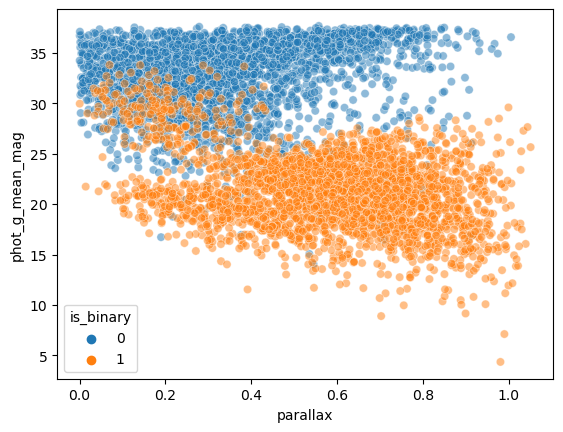

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='parallax', y='phot_g_mean_mag', hue='is_binary', data=pre_s_df, alpha = 0.5)
plt.show()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
import numpy as np

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
# precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

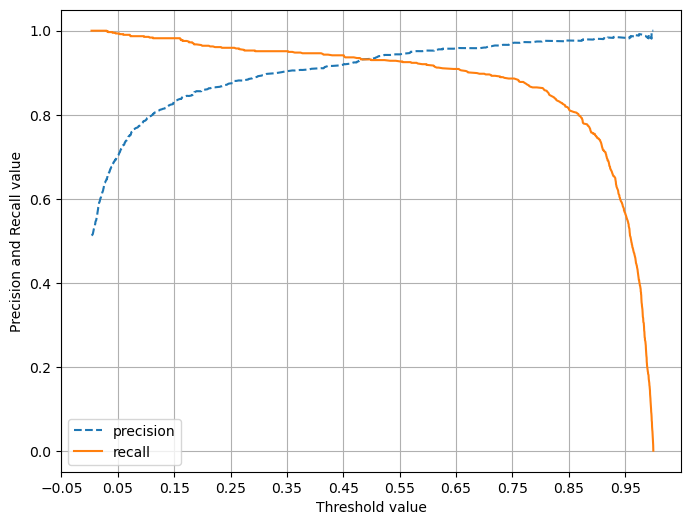

In [31]:
import numpy as np
precision_recall_curve_plot(y_test, grid_lgb.predict_proba(X_test)[:, 1] )

In [32]:
_, _, thresholds = precision_recall_curve(y_test, grid_lgb.predict_proba(X_test)[:, 1])
thresholds

array([0.00343982, 0.00402035, 0.00438591, ..., 0.99990679, 0.99993153,
       0.99994407])

In [33]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [34]:
get_evaluation_by_thresholds(y_test, grid_lgb.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.003439816890468293
오차 행렬
[[  1 583]
 [  0 616]]
정확도: 0.5142, 정밀도: 0.5138, 재현율: 1.0000, F1:0.6788, AUC:0.5009
###########################################################################
임곗값: 0.004020349506966856
오차 행렬
[[  2 582]
 [  0 616]]
정확도: 0.5150, 정밀도: 0.5142, 재현율: 1.0000, F1:0.6792, AUC:0.5017
###########################################################################
임곗값: 0.00438590579531321
오차 행렬
[[  3 581]
 [  0 616]]
정확도: 0.5158, 정밀도: 0.5146, 재현율: 1.0000, F1:0.6795, AUC:0.5026
###########################################################################
임곗값: 0.0048104329693758755
오차 행렬
[[  4 580]
 [  0 616]]
정확도: 0.5167, 정밀도: 0.5151, 재현율: 1.0000, F1:0.6799, AUC:0.5034
###########################################################################
임곗값: 0.004890502377274033
오차 행렬
[[  5 579]
 [  0 616]]
정확도: 0.5175, 정밀도: 0.5155, 재현율: 1.0000, F1:0.6803, AUC:0.5043
###########################################################################
임곗값: 0.005204687609977865
오차 행렬
[[  6 57

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[572  12]
 [119 497]]
정확도: 0.8908, 정밀도: 0.9764, 재현율: 0.8068, F1: 0.8836, ROC-AUC: 0.8931
################################################################################


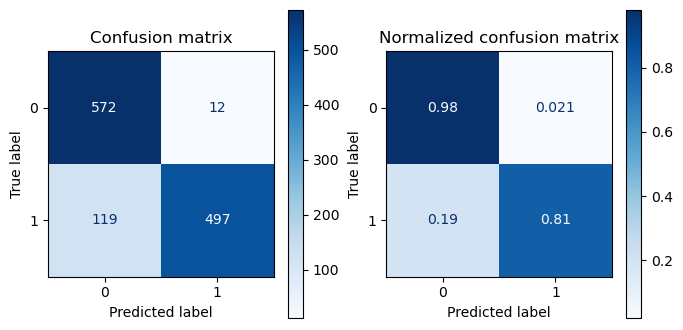

In [36]:
binarizer = Binarizer(threshold=0.8558796444911337)
custom_prediction = binarizer.fit_transform(grid_lgb.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

In [37]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [39]:
pre_s_df.corr()['is_binary'].sort_values(ascending=False)[1:]

parallax                    0.489129
astrometric_excess_noise    0.080101
l                           0.030942
bp_rp                      -0.383016
parallax_error             -0.747552
phot_g_mean_mag            -0.847865
Name: is_binary, dtype: float64

In [42]:
total_importance = sum(grid_lgb.feature_importances_)
for name, value in zip(features.columns, grid_lgb.feature_importances_):
    percentage = (value / total_importance) * 100
    print(f'{name}: {round(percentage, 2)}%')

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'

In [ ]:
feature = features.iloc[:, [0,4]]
visualize_boundary(grid_lgb, feature, targets)